In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [2]:
Crime_data = pd.read_csv("crime_data.csv")
Crime_data.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


## `EDA`

In [3]:
Crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
Crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
Crime_data.value_counts()

Unnamed: 0      Murder  Assault  UrbanPop  Rape
Alabama         13.2    236      58        21.2    1
Pennsylvania    6.3     106      72        14.9    1
Nevada          12.2    252      81        46.0    1
New Hampshire   2.1     57       56        9.5     1
New Jersey      7.4     159      89        18.8    1
New Mexico      11.4    285      70        32.1    1
New York        11.1    254      86        26.1    1
North Carolina  13.0    337      45        16.1    1
North Dakota    0.8     45       44        7.3     1
Ohio            7.3     120      75        21.4    1
Oklahoma        6.6     151      68        20.0    1
Oregon          4.9     159      67        29.3    1
Rhode Island    3.4     174      87        8.3     1
Alaska          10.0    263      48        44.5    1
South Carolina  14.4    279      48        22.5    1
South Dakota    3.8     86       45        12.8    1
Tennessee       13.2    188      59        26.9    1
Texas           12.7    201      80        25.5    

## `Removing column "unnamed:0"` 

In [6]:
Crime_data.drop(['Unnamed: 0'],axis=1,inplace=True)
Crime_data.head(10)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


## `Normalize heterogenous numerical data`

In [7]:
Crime_norm=pd.DataFrame(normalize(Crime_data),columns=Crime_data.columns)
Crime_norm.head(10)

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


## `Within-Cluster Sum of Square`

In [8]:
# We are Using Elbow Graph to find optimum number of clusters (K value) from K values range

wcss=[] # WCSS(Within-Cluster Sum of Square)
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(Crime_norm)
    wcss.append(kmeans.inertia_)

## `Plotting K values range vs WCSS` 

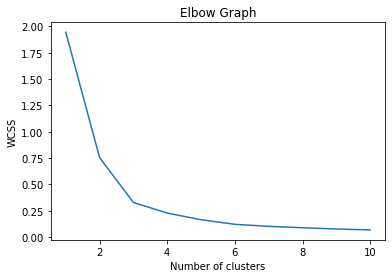

In [9]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## `Build Cluster algorithm using K=4` 

In [10]:
clusters4=KMeans(4,random_state=30).fit(Crime_norm)
clusters4

KMeans(n_clusters=4, random_state=30)

In [11]:
clusters4.labels_

array([1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 2, 3, 1, 0, 2, 0, 3, 1, 0, 1, 0, 1,
       2, 1, 3, 3, 0, 1, 2, 0, 1, 1, 1, 2, 0, 3, 3, 0, 3, 1, 3, 1, 3, 0,
       0, 3, 3, 3, 2, 3], dtype=int32)

## `Importing Clusters to the data set`

In [12]:
Crime_data4=Crime_data.copy()
Crime_data4['clusters_4']=clusters4.labels_
Crime_data4.head(10)

,Murder,Assault,UrbanPop,Rape,clusters_4
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,1


## `Compute the centroids for K=4 clusters with variables`

In [13]:
clusters4.cluster_centers_

array([[0.03689098, 0.84108145, 0.52207436, 0.12738443],
       [0.04531605, 0.95994345, 0.24802482, 0.10322567],
       [0.02971377, 0.65577288, 0.73186384, 0.14305726],
       [0.04205536, 0.90426714, 0.40250352, 0.12472689]])

## `Group Data by Clusters K=4`

In [14]:
Crime_data4.groupby('clusters_4').agg(['mean']).reset_index()

,clusters_4,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,4.881818,111.363636,68.545455,16.354545
1,1,12.021053,260.526316,66.421053,27.694737
2,2,2.616667,54.833333,62.000000,12.333333
3,3,6.542857,145.285714,63.500000,20.107143


## `Plottting Clusters` 

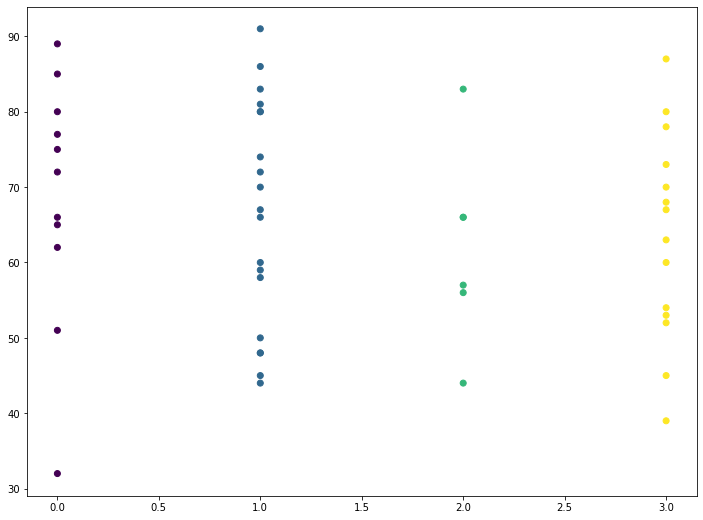

In [15]:
plt.figure(figsize=(12,9))  
plt.scatter(Crime_data4['clusters_4'],Crime_data4['UrbanPop'], c=clusters4.labels_) 

## `Build Cluster algorithm using K=5`

In [16]:
clusters5=KMeans(5,random_state=30).fit(Crime_norm)
clusters5

KMeans(n_clusters=5, random_state=30)

In [17]:
clusters5.labels_

array([1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 4, 3, 1, 0, 2, 0, 3, 1, 0, 1, 0, 1,
       2, 1, 3, 3, 0, 1, 2, 0, 1, 1, 1, 2, 0, 3, 3, 0, 3, 1, 3, 1, 3, 0,
       0, 3, 3, 3, 2, 3], dtype=int32)

## `Importing Clusters to the data set`

In [18]:
Crime_data5=Crime_data.copy()
Crime_data5['clusters_5']=clusters5.labels_
Crime_data5.head(10)

,Murder,Assault,UrbanPop,Rape,clusters_5
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,1


## `Compute the centroids for K=5 clusters with variables`

In [19]:
clusters5.cluster_centers_

array([[0.03689098, 0.84108145, 0.52207436, 0.12738443],
       [0.04531605, 0.95994345, 0.24802482, 0.10322567],
       [0.0247473 , 0.69224362, 0.70739404, 0.13009016],
       [0.04205536, 0.90426714, 0.40250352, 0.12472689],
       [0.05454612, 0.47341917, 0.85421286, 0.20789277]])

## `Group Data by Clusters K=5`

In [20]:
Crime_data5.groupby('clusters_5').agg(['mean']).reset_index()

,clusters_5,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,4.881818,111.363636,68.545455,16.354545
1,1,12.021053,260.526316,66.421053,27.694737
2,2,2.080000,56.600000,57.800000,10.760000
3,3,6.542857,145.285714,63.500000,20.107143
4,4,5.300000,46.000000,83.000000,20.200000


## `Plottting Clusters` 

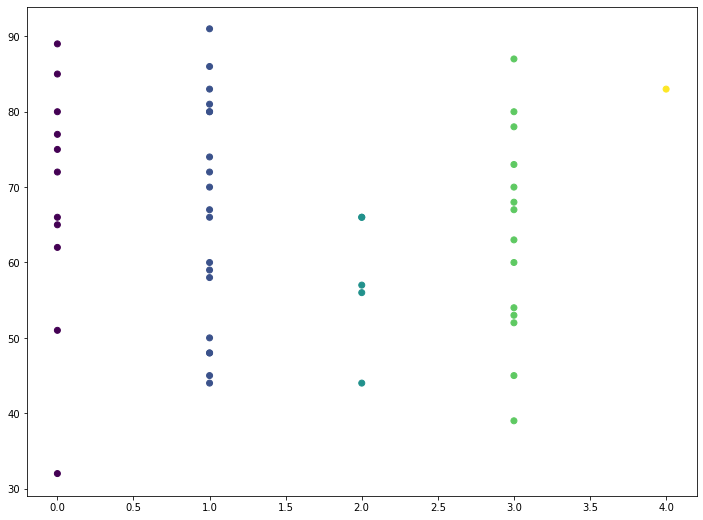

In [21]:
plt.figure(figsize=(12, 9))  
plt.scatter(Crime_data5['clusters_5'],Crime_data5['UrbanPop'], c=clusters5.labels_) 